<a href="https://colab.research.google.com/github/CameronBannick/Uap_prediction/blob/main/project_2_part_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning

In [1]:
#standard imports
import pandas as pd
import numpy as np
#data visual imports
import matplotlib.pyplot as plt
import seaborn as sns
#sklearn imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import set_config
set_config(display='diagram')
from sklearn.linear_model import LogisticRegression

In [2]:
#import data
df = pd.read_csv('Data/nuforc_reports.csv')
df.head()

summary        city state  \
0  My wife was driving southeast on a fairly popu...     Chester    VA   
1  I think that I may caught a UFO on the NBC Nig...  Rocky Hill    CT   
2  I woke up late in the afternoon 3:30-4pm. I we...         NaN   NaN   
3  I was driving towards the intersection of fall...      Ottawa    ON   
4  In Peoria Arizona, I saw a cigar shaped craft ...      Peoria    NY   

             date_time     shape     duration  \
0  2019-12-12T18:43:00     light    5 seconds   
1  2019-03-22T18:30:00    circle  3-5 seconds   
2                  NaN       NaN          NaN   
3  2019-04-17T02:00:00  teardrop   10 seconds   
4  2009-03-15T18:00:00     cigar    2 minutes   

                                               stats  \
0  Occurred : 12/12/2019 18:43  (Entered as : 12/...   
1  Occurred : 3/22/2019 18:30  (Entered as : 03/2...   
2  Occurred : 4/1/2019 15:45  (Entered as : April...   
3  Occurred : 4/17/2019 02:00  (Entered as : 04-1...   
4  Occurred : 3/15/2009 18:00  (Entered as : 03/1...   

                                         report_link  \
0  http://www.nuforc.org/webreports/151/S151739.html   
1  http://www.nuforc.org/webreports/145/S145297.html   
2  http://www.nuforc.org/webreports/145/S145556.html   
3  http://www.nuforc.org/webreports/145/S145697.html   
4  http://www.nuforc.org/webreports/145/S145723.html   

                                                text               posted  \
0  My wife was driving southeast on a fairly popu...  2019-12-22T00:00:00   
1  I think that I may caught a UFO on the NBC Nig...  2019-03-29T00:00:00   
2  I woke up late in the afternoon 3:30-4pm.  I w...                  NaN   
3  I was driving towards the intersection of fall...  2019-04-18T00:00:00   
4  In Peoria, Arizona, I saw a cigar shaped craft...  2019-04-18T00:00:00   

   city_latitude  city_longitude  
0      37.343152      -77.408582  
1      41.664800      -72.639300  
2            NaN             NaN  
3      45.381383      -75.708501  
4            NaN             NaN

In [3]:
#seeing info on all data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88125 entries, 0 to 88124
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   summary         88095 non-null  object 
 1   city            87891 non-null  object 
 2   state           82890 non-null  object 
 3   date_time       86938 non-null  object 
 4   shape           85627 non-null  object 
 5   duration        84954 non-null  object 
 6   stats           88088 non-null  object 
 7   report_link     88125 non-null  object 
 8   text            88070 non-null  object 
 9   posted          86938 non-null  object 
 10  city_latitude   72013 non-null  float64
 11  city_longitude  72013 non-null  float64
dtypes: float64(2), object(10)
memory usage: 8.1+ MB


In [4]:
#check for duplicates
df.duplicated().sum()

0

In [5]:
#removing unneccesary columns
df = df.drop(columns=['summary', 'stats', 'report_link', 'text', 'posted', 'city', 'duration'])
df.head()

state            date_time     shape  city_latitude  city_longitude
0    VA  2019-12-12T18:43:00     light      37.343152      -77.408582
1    CT  2019-03-22T18:30:00    circle      41.664800      -72.639300
2   NaN                  NaN       NaN            NaN             NaN
3    ON  2019-04-17T02:00:00  teardrop      45.381383      -75.708501
4    NY  2009-03-15T18:00:00     cigar            NaN             NaN

In [6]:
#checking values for Y
df['shape'].value_counts()

light        18230
circle       10130
triangle      7910
fireball      7095
unknown       6182
sphere        6065
other         5749
disk          4522
oval          3857
formation     2842
changing      2112
cigar         1990
flash         1675
rectangle     1597
cylinder      1374
diamond       1273
chevron        953
teardrop       767
egg            666
cone           349
cross          289
Name: shape, dtype: int64

In [7]:
#inspecting object data
dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols
#for statement to cycle through object data
for col in str_cols:
    print(f"- Column= {col}")
    print(df[col].value_counts(dropna=False))
    print('\n\n')

- Column= state
CA     9506
FL     5294
NaN    5235
WA     3856
TX     3481
       ... 
YT       17
PE       13
NT       10
PR        2
QB        1
Name: state, Length: 66, dtype: int64



- Column= date_time
NaN                    1187
2015-11-07T18:00:00     104
2014-07-04T22:00:00      46
2010-07-04T22:00:00      37
2012-07-04T22:00:00      34
                       ... 
2011-07-23T23:20:00       1
2011-07-23T23:47:00       1
2011-07-24T00:00:00       1
2011-07-24T00:02:00       1
2019-12-12T18:43:00       1
Name: date_time, Length: 73123, dtype: int64



- Column= shape
light        18230
circle       10130
triangle      7910
fireball      7095
unknown       6182
sphere        6065
other         5749
disk          4522
oval          3857
formation     2842
NaN           2498
changing      2112
cigar         1990
flash         1675
rectangle     1597
cylinder      1374
diamond       1273
chevron        953
teardrop       767
egg            666
cone           349
cross          289
N

In [8]:
#function engineering with Datetime
df['date_time']=pd.to_datetime(df['date_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88125 entries, 0 to 88124
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   state           82890 non-null  object        
 1   date_time       86938 non-null  datetime64[ns]
 2   shape           85627 non-null  object        
 3   city_latitude   72013 non-null  float64       
 4   city_longitude  72013 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 3.4+ MB


In [9]:
#adding new time based features with datetime
df['year']= df['date_time'].dt.year
df['month (name)']=df['date_time'].dt.month_name()
df['day of week (name)']=df['date_time'].dt.day_name()
df.head()





state           date_time     shape  city_latitude  city_longitude    year  \
0    VA 2019-12-12 18:43:00     light      37.343152      -77.408582  2019.0   
1    CT 2019-03-22 18:30:00    circle      41.664800      -72.639300  2019.0   
2   NaN                 NaT       NaN            NaN             NaN     NaN   
3    ON 2019-04-17 02:00:00  teardrop      45.381383      -75.708501  2019.0   
4    NY 2009-03-15 18:00:00     cigar            NaN             NaN  2009.0   

  month (name) day of week (name)  
0     December           Thursday  
1        March             Friday  
2          NaN                NaN  
3        April          Wednesday  
4        March             Sunday

In [10]:
#dropping now redundant date_time column
df=df.drop(columns='date_time')
df.head()

state     shape  city_latitude  city_longitude    year month (name)  \
0    VA     light      37.343152      -77.408582  2019.0     December   
1    CT    circle      41.664800      -72.639300  2019.0        March   
2   NaN       NaN            NaN             NaN     NaN          NaN   
3    ON  teardrop      45.381383      -75.708501  2019.0        April   
4    NY     cigar            NaN             NaN  2009.0        March   

  day of week (name)  
0           Thursday  
1             Friday  
2                NaN  
3          Wednesday  
4             Sunday

In [11]:
#drop nan if my future y
df=df.dropna(subset=['shape'])
df.isna().sum()

state                  4946
shape                     0
city_latitude         15514
city_longitude        15514
year                   1099
month (name)           1099
day of week (name)     1099
dtype: int64

# Date Visualizations

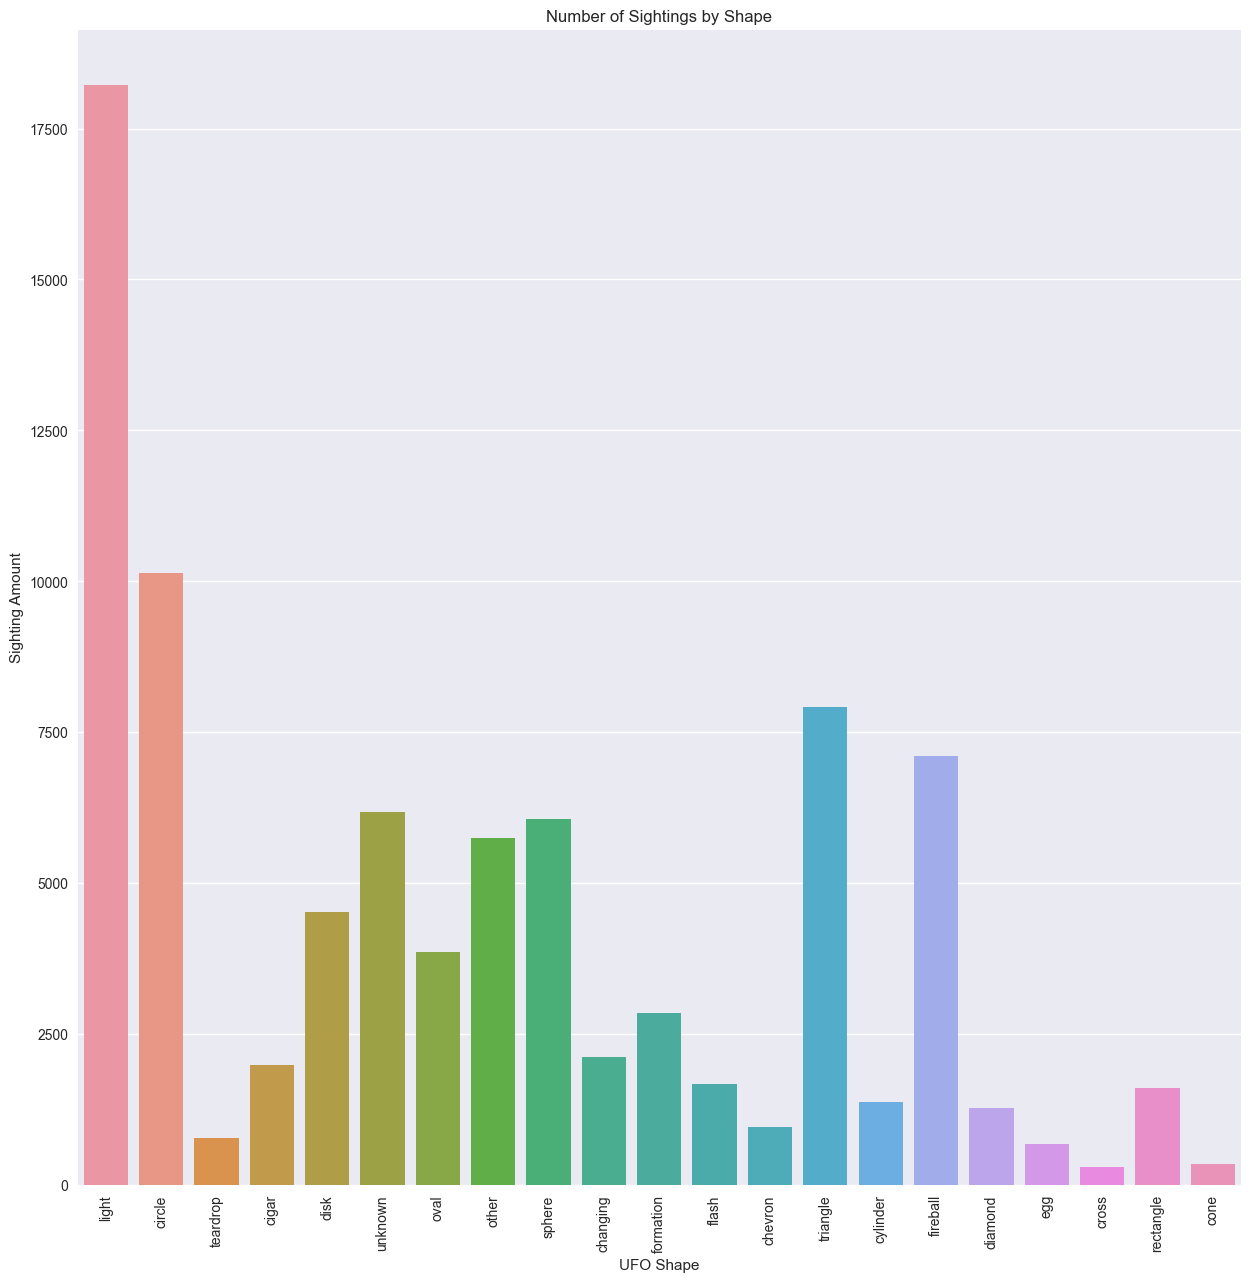

In [16]:
#first visual showing amount of sights by shape
plt.style.use('seaborn')
plt.figure(figsize=(15,15))
sns.countplot(data=df, x='shape')
plt.xlabel('UFO Shape')
plt.xticks(rotation='vertical')
plt.ylabel('Sighting Amount')
plt.title('Number of Sightings by Shape')
plt.savefig('Number of sightings by shape.jpg')
plt.show()

Most people seem to report solely balls of light as the most common 'shape' for UFOs. Followed by 'circle', 'triangle', and 'fireball'. Note that this question was an open response, so things like 'fireball' and 'light' could be the same phenomenon as well as 'sphere' and 'circle'

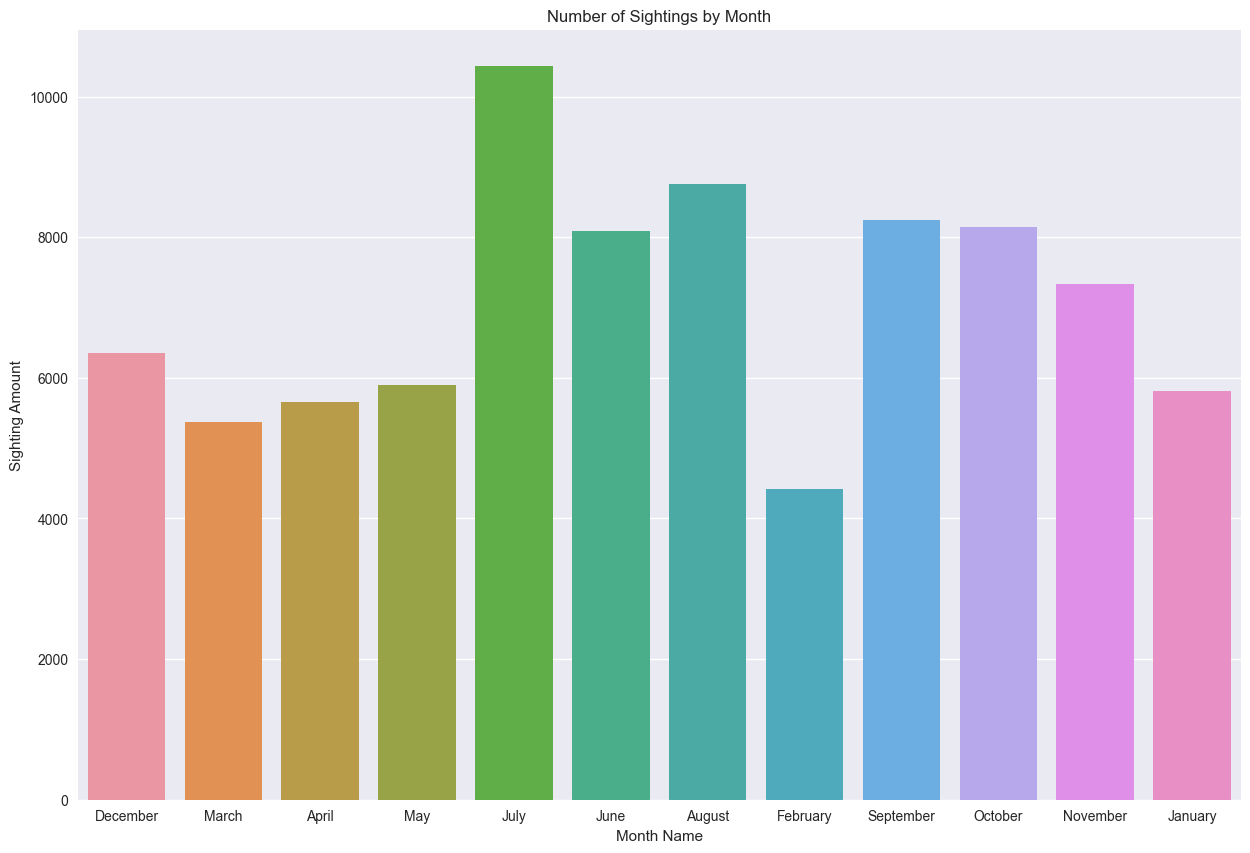

In [19]:
#data visual showing number of sightings by month
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='month (name)')
plt.xlabel('Month Name')
plt.ylabel('Sighting Amount')
plt.title('Number of Sightings by Month')
plt.savefig('Number of sightings by month.jpg')
plt.show()

Our data suggests that UFO sightings are most common between June and October with a slow down in the winter months, while ramping up again as we progress to spring



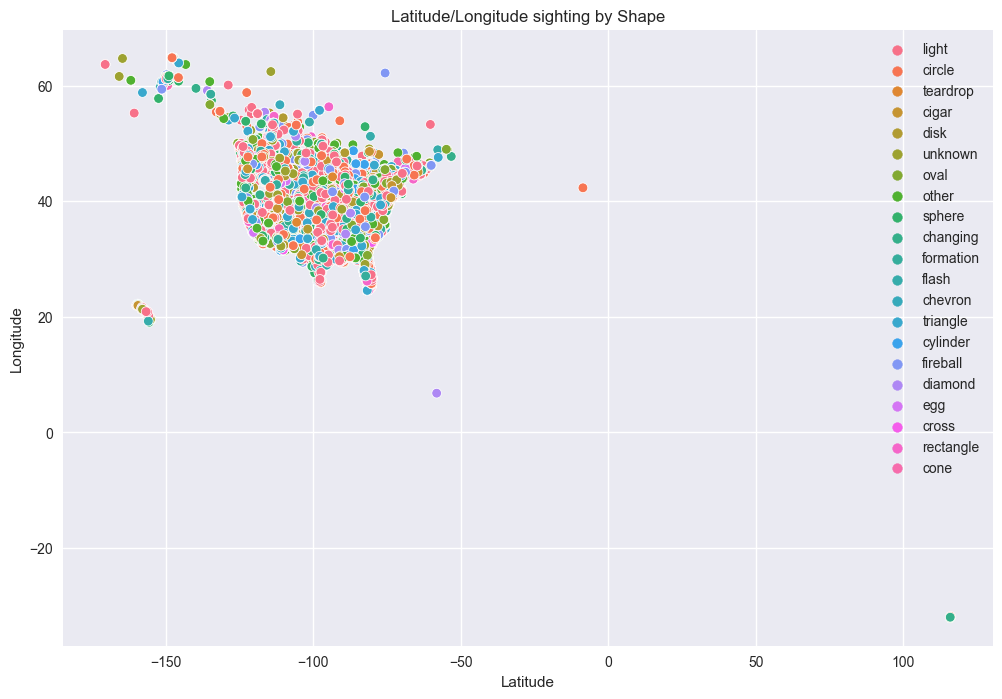

In [20]:
#creating a scatter plot with longitude and latitude
plt.figure(figsize=(12,8))
ax = sns.scatterplot(data=df, x='city_longitude', y='city_latitude', hue='shape')
ax.legend(bbox_to_anchor=[1,1]);
ax.set_title('Latitude/Longitude sighting by Shape')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
plt.savefig('Map of sigthings')
plt.show()

There seems to be no discernable pattern of how each shape is appearing, meaning different shapes don't seem to have their own territory. This implies that since there is no order, there is a possibility their might not be 'one culprit' behind the UFO phenomenae 

# Predictive Model

## Preprocess Data

In [15]:
#create our X and y varaible
X=df.drop(columns='shape')
y=df['shape']
#instance of train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
#instance of scaler and one hot encoder
scaler = StandardScaler()
ohe= OneHotEncoder(handle_unknown='ignore')
#instance simple inmpute for column selector
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
#create column selectors for each dtype
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [17]:
#pipelines for each dtype
num_pipe = make_pipeline(mean_imputer, scaler)
cat_pipe = make_pipeline(freq_imputer, ohe)
#tuple for each dtype
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

In [18]:
#create preprocessor
preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor.fit(X_train, y_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000002A7E413AAC0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000002A7E413A790>)])

## Model 1: Decision Tree

### Model 1-A (untuned)

In [19]:
#initiate Decision Tree Model
dec_tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)
#make pipeline for model and preprocessor
dec_pipe = make_pipeline(preprocessor, dec_tree)
#fit training data
dec_pipe.fit(X_train, y_train)
#call our test predictions
test_pred = dec_pipe.predict(X_test)
#printing classification report
test_acc = classification_report(y_test, test_pred)
print(test_acc)


              precision    recall  f1-score   support

    changing       0.04      0.05      0.05       558
     chevron       0.04      0.06      0.05       232
       cigar       0.04      0.05      0.04       497
      circle       0.16      0.14      0.15      2512
        cone       0.03      0.05      0.04        82
       cross       0.02      0.03      0.02        78
    cylinder       0.05      0.06      0.06       356
     diamond       0.04      0.05      0.04       327
        disk       0.12      0.13      0.13      1128
         egg       0.02      0.03      0.02       153
    fireball       0.16      0.16      0.16      1796
       flash       0.05      0.07      0.06       370
   formation       0.05      0.06      0.06       719
       light       0.26      0.21      0.23      4526
       other       0.08      0.08      0.08      1436
        oval       0.08      0.08      0.08       989
   rectangle       0.02      0.02      0.02       372
      sphere       0.10    

### Model 1-B (tuned parameters)

In [20]:
#calling on the parameters of model
dec_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x000002A7E413AAC0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x0

In [21]:
#creating dictionary of parameters for gridsearchcv
param_grid = {'decisiontreeclassifier__max_depth': [1, 5, 10],
              'decisiontreeclassifier__min_samples_leaf': [1, 2, 3],
              'decisiontreeclassifier__min_samples_split': [2, 3, 4]}
#create instance of gridsearchcv
dt_grid = GridSearchCV(dec_pipe, param_grid)
#fitting training data
dt_grid.fit(X_train, y_train)
#calling test predictions
test_pred = dt_grid.predict(X_test)
#print metrics
print(classification_report(y_test, test_pred))


C:\Users\camer\anaconda3\envs\dojo-env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    changing       0.00      0.00      0.00       558
     chevron       0.01      0.11      0.02       232
       cigar       0.03      0.24      0.05       497
      circle       0.00      0.00      0.00      2512
        cone       0.02      0.10      0.03        82
       cross       0.01      0.05      0.02        78
    cylinder       0.00      0.00      0.00       356
     diamond       0.00      0.00      0.00       327
        disk       0.15      0.23      0.18      1128
         egg       0.00      0.00      0.00       153
    fireball       0.13      0.39      0.19      1796
       flash       0.02      0.39      0.04       370
   formation       0.00      0.00      0.00       719
       light       0.00      0.00      0.00      4526
       other       0.50      0.00      0.00      1436
        oval       0.00      0.00      0.00       989
   rectangle       0.00      0.00      0.00       372
      sphere       0.00    

C:\Users\camer\anaconda3\envs\dojo-env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\camer\anaconda3\envs\dojo-env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model 2: KNeighborsClassifier

### Model 2-A (untuned)

In [22]:
#initiate instance of KNN model 
knn = KNeighborsClassifier()
#instance of make_pipeline for model and preprocessor
knn_pipe = make_pipeline(preprocessor, knn)
#fit training data 
knn_pipe.fit(X_train, y_train)
#calling test predicitons
test_pred = knn_pipe.predict(X_test)
#printing metrics
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

    changing       0.04      0.08      0.05       558
     chevron       0.03      0.07      0.04       232
       cigar       0.03      0.07      0.05       497
      circle       0.13      0.24      0.17      2512
        cone       0.03      0.02      0.03        82
       cross       0.00      0.00      0.00        78
    cylinder       0.02      0.02      0.02       356
     diamond       0.02      0.02      0.02       327
        disk       0.10      0.10      0.10      1128
         egg       0.05      0.03      0.04       153
    fireball       0.13      0.15      0.14      1796
       flash       0.07      0.04      0.05       370
   formation       0.05      0.03      0.04       719
       light       0.23      0.29      0.26      4526
       other       0.08      0.04      0.05      1436
        oval       0.06      0.02      0.03       989
   rectangle       0.01      0.00      0.00       372
      sphere       0.09    

### Model 2-B (tuned)

In [23]:
#calling parameters for model
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x000002A7E413AAC0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x0

In [24]:
#make dictionary of parameters for gridsearchcv
k_param_grid = {'kneighborsclassifier__leaf_size': [10, 20, 30],
              'kneighborsclassifier__n_neighbors': [1, 3, 5],
              'kneighborsclassifier__p': [1, 2, 3]}
#instance of gridsearchcv
knn_grid = GridSearchCV(knn_pipe, k_param_grid)
#fit training data
knn_grid.fit(X_train, y_train)
#calling test predicitons
test_pred = knn_grid.predict(X_test)
#print metrics
print(classification_report(y_test, test_pred))


KeyboardInterrupt



## Model 3: Logistic Regression

### Model 3-A (untuned)

In [27]:
#instance of model
logreg = LogisticRegression(C=1000, class_weight='balanced')
#make pipeling for mode
logpipe = make_pipeline(preprocessor, logreg)
#fit training data
logpipe.fit(X_train, y_train)
#calling test predictions
test_pred = logpipe.predict(X_test)
#print metrics
print(classification_report(y_test, test_pred))

C:\Users\camer\anaconda3\envs\dojo-env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    changing       0.03      0.03      0.03       558
     chevron       0.02      0.22      0.04       232
       cigar       0.03      0.08      0.05       497
      circle       0.11      0.00      0.01      2512
        cone       0.01      0.18      0.01        82
       cross       0.00      0.18      0.01        78
    cylinder       0.02      0.05      0.03       356
     diamond       0.03      0.10      0.04       327
        disk       0.13      0.15      0.14      1128
         egg       0.01      0.05      0.01       153
    fireball       0.14      0.15      0.14      1796
       flash       0.02      0.09      0.04       370
   formation       0.04      0.06      0.05       719
       light       0.25      0.00      0.00      4526
       other       0.06      0.00      0.01      1436
        oval       0.05      0.02      0.02       989
   rectangle       0.02      0.01      0.01       372
      sphere       0.06    

{0.0001: 0.21142616901013686,
 0.001: 0.21142616901013686,
 0.01: 0.21366842621572382,
 0.1: 0.2133414303732424,
 1: 0.21301443453076097,
 10: 0.21292100714719484,
 100: 0.21287429345541178,
 1000: 0.21287429345541178}

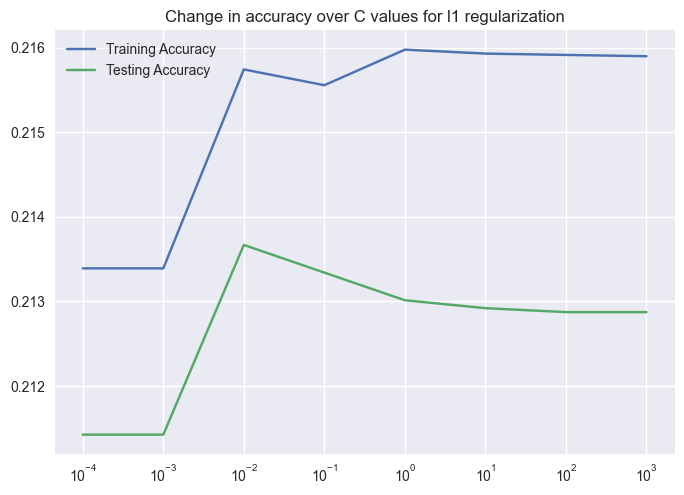

In [29]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(preprocessor, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

Tuning would not significantly impact performace of the model

# Conclusions on Model

While normally I would recommend the most effective model, none of these models are doing a good job at understanding the data to determine the shape of the UFO. My recommendations would be to, as opposed to using civilian data, try and use data collect exclusively from the military. With this you will have more of a uniformity and a better chance of consistency. All of our shape values could have redundancies in the column (i.e. circle and sphere). I was not comfortable doing this myself, because I was no there and I would be projecting my own ideas into the data